# Beer Data Analysis - Evolent Health
This project was given by Evolent Health as a take home assignment as part of their interview process.\
Further details of the project can be found [here](https://platform.stratascratch.com/data-projects/beer-data-analysis)

## Questions
The point of the analysis is to answer the following questions:
1. Rank the top 3 breweries which produce the strongest beers.
2. Which year did beers enjoy the highest ratings?
3. Based on the users' ratings, which factors are important among taste, aroma, appearance, and palette?
4. If you were to recommend beers to your friends based on this data, which ones would you recommend?
5. Which beer style seems to be the favourite based on the reviews written by users? How does written reviews compare to overall review score for the beer style?

## Dataset Details
`beer_ABV` - alcohol by volume\
`beer_beerId` - beer ID\
`beer_brewerId` - beer brewer ID\
`beer_name` - beer name\
`beer_style` - beer style\
`review_appearance` - review on the beer's appearance\
`review_palette` - review on the beer's palette (colours)\
`review_overall` - overall beer review\
`review_taste` - review on the beer's taste\
`review_profileName` - profile name of the reviewer\
`review_aroma` - review on the beer's aroma\
`review_text` - the full text of the review\
`review_time` - timestamp when the review was made\

## Data Exploration

In [1]:
# importing the varios libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# extra step for google collab to import files
# from google.colab import drive
# drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
# there are some non UTF-8 characters in the dataset, so encoding=latin-1 is needed
beer = pd.read_csv('dataset/BeerReview.tar.bz2', compression='bz2', encoding='latin-1')
beer.head()

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,A lot of foam. But a lot. In the smell some ba...,1234817823
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In ...",1235915097
2,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,"Almost totally black. Beige foam, quite compac...",1235916604
3,5.0,47969,10325,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3.0,"Golden yellow color. White, compact foam, quit...",1234725145
4,7.7,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,johnmichaelsen,4.5,"According to the website, the style for the Ca...",1293735206


In [3]:
beer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528870 entries, 0 to 528869
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   beer_ABV            508590 non-null  float64
 1   beer_beerId         528870 non-null  int64  
 2   beer_brewerId       528870 non-null  int64  
 3   beer_name           528870 non-null  object 
 4   beer_style          528870 non-null  object 
 5   review_appearance   528870 non-null  float64
 6   review_palette      528870 non-null  float64
 7   review_overall      528870 non-null  float64
 8   review_taste        528870 non-null  float64
 9   review_profileName  528755 non-null  object 
 10  review_aroma        528870 non-null  float64
 11  review_text         528751 non-null  object 
 12  review_time         528870 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 52.5+ MB


In [4]:
beer.shape

(528870, 13)

In [5]:
beer.isna().sum()

beer_ABV              20280
beer_beerId               0
beer_brewerId             0
beer_name                 0
beer_style                0
review_appearance         0
review_palette            0
review_overall            0
review_taste              0
review_profileName      115
review_aroma              0
review_text             119
review_time               0
dtype: int64

Decided to hold onto the null beer_ABV rows for now since it only affects data exloration where beer_ABV is used. All other cases it doesn't matter.

In [6]:
beer[['beer_ABV', 'review_appearance', 'review_palette', 'review_overall', 'review_taste', 'review_aroma']].describe()

,beer_ABV,review_appearance,review_palette,review_overall,review_taste,review_aroma
count,508590.000000,528870.000000,528870.000000,528870.000000,528870.000000,528870.000000
mean,7.017442,3.864522,3.758926,3.833197,3.765993,3.817350
std,2.204460,0.604010,0.685335,0.709962,0.669018,0.718903
min,0.010000,0.000000,1.000000,0.000000,1.000000,1.000000
25%,5.300000,3.500000,3.500000,3.500000,3.500000,3.500000
50%,6.500000,4.000000,4.000000,4.000000,4.000000,4.000000
75%,8.500000,4.000000,4.000000,4.500000,4.000000,4.500000
max,57.700000,5.000000,5.000000,5.000000,5.000000,5.000000


In [7]:
# checking for repeat entries
beer.nunique()

beer_ABV                 283
beer_beerId            20200
beer_brewerId           1803
beer_name              18339
beer_style               104
review_appearance         10
review_palette             9
review_overall            10
review_taste               9
review_profileName     22800
review_aroma               9
review_text           528371
review_time           527927
dtype: int64

In [8]:
# checking for duplicated rows
beer[beer.duplicated()].shape

(0, 13)

No exact duplicate rows

## Data Cleaning(or rather, lack thereof)
Deciding not to drop reviews of the beers, thus keeping multiple reviews for each beer.\
My logic is that some beers are more complex so there may be a need for multiple reviews to be conducted to get multiple opinions.\
In this scenario I would ask the dataset owner what's the appropriate method of measure.

## Analysis

### Question 1 - Top 3 breweries which produce the strongest beers
Intepreting this as brewers who make the top 3 strongest beers.

In [9]:
# checking the duplicate beerId - we know there are duplicates from the sanity check above
duplicates = beer[beer.duplicated(subset='beer_beerId', keep=False)]
duplicates.shape

(521735, 13)

In [10]:
# duplicates of beerId with ABV
duplicates = beer[beer.duplicated(subset=['beer_beerId', 'beer_ABV'], keep=False)]
duplicates.shape

(521735, 13)

Good to know that ABV is kept constant for each and every beer ID

In [11]:
# getting only the unique beers
beer_uniquebeer = beer.drop_duplicates(subset='beer_beerId', keep='first')

# getting the brewers and the beer_ABV
beer_strength_brewer = beer_uniquebeer[['beer_brewerId', 'beer_ABV']]
beer_strength_brewer = beer_strength_brewer.dropna()
beer_strength_brewer.head()

,beer_brewerId,beer_ABV
0,10325,5.0
1,10325,6.2
2,10325,6.5
3,10325,5.0
4,1075,7.7


In [12]:
top_brewers = beer_strength_brewer.groupby('beer_brewerId').agg({'beer_ABV':'max'}).reset_index().sort_values('beer_ABV', ascending=False)
top_brewers['rank'] = top_brewers['beer_ABV'].rank(method='dense', ascending=False)
top_brewers.head()

,beer_brewerId,beer_ABV,rank
699,6513,57.7,1.0
7,35,27.0,2.0
1193,16866,19.5,3.0
448,2958,19.5,3.0
1259,18796,19.2,4.0


In [13]:
# top 3 beers by AVB and their respective brewers are
top_brewers[top_brewers['rank'] <= 3]

,beer_brewerId,beer_ABV,rank
699,6513,57.7,1.0
7,35,27.0,2.0
1193,16866,19.5,3.0
448,2958,19.5,3.0


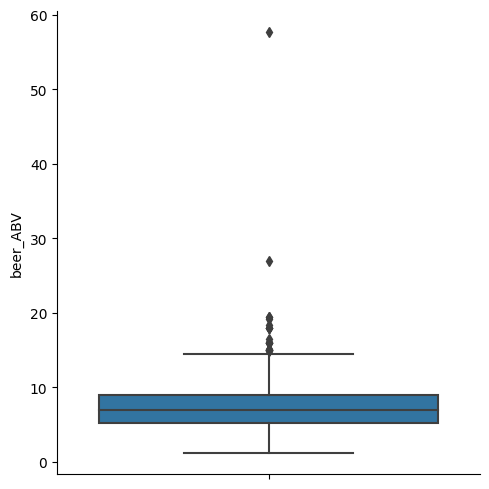

In [14]:
# taking a look at the distribution
sns.catplot(y='beer_ABV',
           data=top_brewers,
           kind='box')
plt.show()

Some observations:
1. brewerId 6513 is an extreme outlier who makes a beer with 57.7% alcohol.
2. Most of the other high alcohol percentage outliers are within the 15-20% range
3. The IQR range of most beers are in the 5-10% alchohol range; the median is somewhere around 8% alcohol.

### Question 2 - Which year did beers enjoy the highest ratings?

In [15]:
# changing unix timestamp to datetime
beer['review_year'] = pd.to_datetime(beer['review_time'], unit='s').dt.year
beer['review_year'].head()

0    2009
1    2009
2    2009
3    2009
4    2010
Name: review_year, dtype: int64

In [16]:
beer_rating = beer[['review_year', 'review_overall']]
beer_rating.head()

,review_year,review_overall
0,2009,1.5
1,2009,3.0
2,2009,3.0
3,2009,3.0
4,2010,4.0


In [17]:
beer_rating_year_mean = beer_rating.groupby('review_year').agg({'review_overall':'mean'}).reset_index()
beer_rating_year_mean = beer_rating_year_mean.rename(columns={'review_overall':'mean_review_overall'}).sort_values('mean_review_overall', ascending=False)
beer_rating_year_mean.head()

,review_year,mean_review_overall
2,2000,4.181818
1,1999,4.000000
3,2001,3.927741
0,1998,3.891304
12,2010,3.866139


Note: Did not drop any null values because there are no null values in the review_year and review_overall columns.\
This result table above is fine; but it's a good idea to check the number of reviews per year - maybe we have low number of reviews in certain years - driving up that year's mean overall review

In [18]:
beer_rating_year_count = beer_rating.groupby('review_year').agg({'review_overall':'count'}).reset_index()
beer_rating_year_count = beer_rating_year_count.rename(columns={'review_overall':'count_review_overall'}).sort_values('count_review_overall', ascending=False)
beer_rating_year_count.head()

,review_year,count_review_overall
13,2011,110836
12,2010,93810
11,2009,83578
10,2008,69080
9,2007,46514


In [19]:
# sanity checking the unique years for each count and mean table
print("mean years: " + beer_rating_year_mean['review_year'].drop_duplicates().sort_values().astype(str))
print("count years: " + beer_rating_year_count['review_year'].drop_duplicates().sort_values().astype(str))

0     mean years: 1998
1     mean years: 1999
2     mean years: 2000
3     mean years: 2001
4     mean years: 2002
5     mean years: 2003
6     mean years: 2004
7     mean years: 2005
8     mean years: 2006
9     mean years: 2007
10    mean years: 2008
11    mean years: 2009
12    mean years: 2010
13    mean years: 2011
14    mean years: 2012
Name: review_year, dtype: object
0     count years: 1998
1     count years: 1999
2     count years: 2000
3     count years: 2001
4     count years: 2002
5     count years: 2003
6     count years: 2004
7     count years: 2005
8     count years: 2006
9     count years: 2007
10    count years: 2008
11    count years: 2009
12    count years: 2010
13    count years: 2011
14    count years: 2012
Name: review_year, dtype: object


In [20]:
# left join into a new df for plotting
beer_rating_merge = beer_rating_year_mean.merge(beer_rating_year_count, on='review_year', how='left').sort_values('mean_review_overall', ascending=False)
beer_rating_merge.head(20)

,review_year,mean_review_overall,count_review_overall
0,2000,4.181818,33
1,1999,4.000000,25
2,2001,3.927741,602
3,1998,3.891304,23
4,2010,3.866139,93810
5,2009,3.864390,83578
6,2008,3.833939,69080
7,2005,3.832042,29433
8,2012,3.829717,3180
9,2011,3.828093,110836


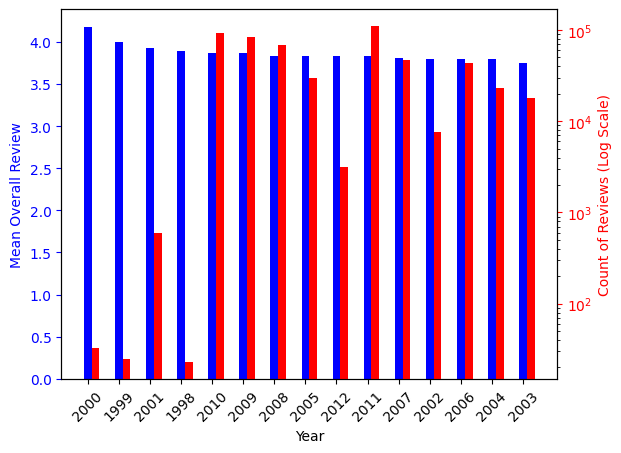

In [21]:
# plotting into a bar plot
fig, ax = plt.subplots()

# setting up inices to sort the x axis in chronologial order
indices = np.arange(len(beer_rating_merge['review_year']))

# setting up bar plot
ax.bar(indices, beer_rating_merge['mean_review_overall'], color='b', width=0.25)

ax.set_xlabel('Year')
ax.set_xticks(indices)
ax.set_xticklabels(beer_rating_merge['review_year'], rotation=45)
ax.set_ylabel('Mean Overall Review', color='b')
ax.tick_params('y', colors='b')

# setting up another y axis
ax2 = plt.twinx()

# shifting the other bar plot
x_shift = indices + 0.25
ax2.bar(x_shift, beer_rating_merge['count_review_overall'], color='r', width=0.25)

# setting up the other bar plot
ax2.set_yscale('log')  # setting the scale to log scale cuz there are some extremely large numbers
ax2.set_ylabel('Count of Reviews (Log Scale)', color='r')
ax2.tick_params('y', colors='r')

# plot
plt.show()

Interestingly we can see that, yes, the year 2000 had the best mean overall reviews; but notice that there's only 33 numbers of reviews.\
For the year 2011, the mean overall review is 3.82; but having 110836 number of reviews (this is a massive number).\
Note the log scale is used when visualizing the y-axis count of reviews to help better show the bars; else the bars showing 33 number of reviews would barely be visible.

### Question 3 - Based on the users' ratings, which factors are important among taste, aroma, appearance, and palette?

In [22]:
# let's try using correlation to determine the relation between the different factors and overall review score
beer_reviews = beer.groupby('beer_beerId')[[
    'review_taste',
    'review_aroma',
    'review_appearance',
    'review_palette',
    'review_overall'
]].mean()
beer_reviews.head()

,review_taste,review_aroma,review_appearance,review_palette,review_overall
beer_beerId,,,,,
3,4.166667,4.166667,3.833333,4.000000,4.166667
4,3.700000,3.450000,3.950000,3.800000,3.700000
5,3.318396,3.340802,3.485849,3.205189,3.549528
6,3.513113,3.645382,3.836374,3.515964,3.706956
7,3.106980,3.101669,3.251138,3.179059,3.266313


Again, decided not to drop any rows containing null values due to them all being valid for getting the mean review score.\
It's plausible to drop rows not having a review_profileName - but I'm choosing not to on the grounds the reviewer did not put their name for certain reasons (maybe anonymity).\
In reality I would ask the dataset owner if this assumption is valid.

In [23]:
beer_reviews.corr()

,review_taste,review_aroma,review_appearance,review_palette,review_overall
review_taste,1.000000,0.821956,0.659598,0.736896,0.809601
review_aroma,0.821956,1.000000,0.637400,0.813106,0.873737
review_appearance,0.659598,0.637400,1.000000,0.647649,0.614839
review_palette,0.736896,0.813106,0.647649,1.000000,0.747198
review_overall,0.809601,0.873737,0.614839,0.747198,1.000000


<Axes: >

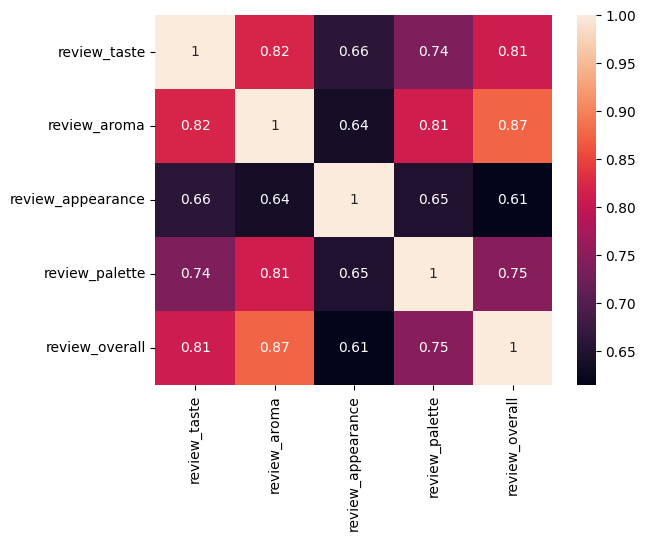

In [24]:
# heatmap to better visualize the correlation
sns.heatmap(data=beer_reviews.corr(), annot=True)

Taking a look at the heatmap above, we can see that the aroma and the taste of the beer are the two most correlated factors to the overall review. We can deduce that if the beer smells and tastes pleasant, it's likely a good beer (a very logical reasoning).

### Question 4 - If you were to recommend beers to your friends based on this data, which ones would you recommend?

This is quite an open-ended question. Obviously this will vary from person to person.\
I can think of a few approaches:
1. Take a look at beers with decent number of reviews and decent review scores.
2. Perhaps pale lagers or lagers - these shouldn't be so "hoppy"

In [25]:
# taking a look at number of reviews
beer_revcount = beer.groupby('beer_beerId')['review_overall'].agg(['count', 'mean']).reset_index()
beer_revcount = beer_revcount.rename(columns={'count':'count_reviews',
                                              'mean':'mean_review_overall'})
beer_revcount.head()

,beer_beerId,count_reviews,mean_review_overall
0,3,3,4.166667
1,4,10,3.700000
2,5,424,3.549528
3,6,877,3.706956
4,7,659,3.266313


In [26]:
beer_revcount.describe()

,beer_beerId,count_reviews,mean_review_overall
count,20200.000000,20200.000000,20200.000000
mean,39720.080990,26.181683,3.651862
std,22621.433795,123.799950,0.631129
min,3.000000,1.000000,1.000000
25%,19925.750000,1.000000,3.399774
50%,40712.500000,2.000000,3.750000
75%,59531.250000,7.000000,4.000000
max,77310.000000,3000.000000,5.000000


Median number of reviews is 2 per beer - there are some really niche/rare beers that don't see a lot of fans.

[]

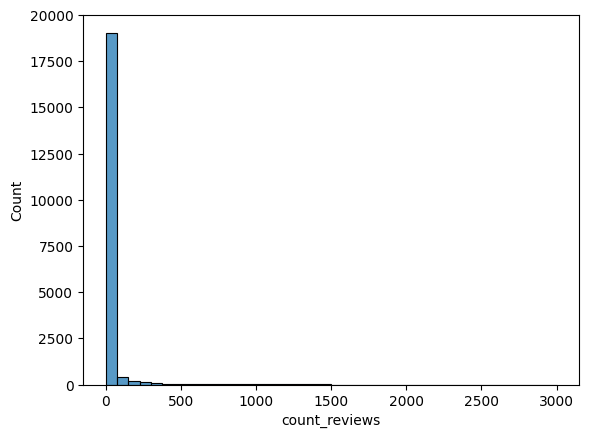

In [27]:
# making a hist to see the distribution of number of reviews
sns.histplot(data=beer_revcount, x='count_reviews', bins=40)
plt.plot()

In [28]:
# picking the more popular beers - which have more number of reviews
# let's just arbitrarily pick beers that have >= 500 reviews - these should be extra popular
popular_beer = beer_revcount[beer_revcount['count_reviews'] >= 500]

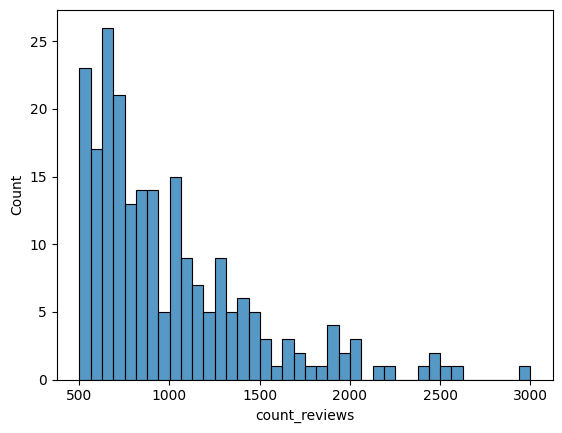

In [29]:
sns.histplot(data=popular_beer, x='count_reviews', bins=40)
plt.show()

In [31]:
# sorting the beers by overall review, then number of reviews
popular_beer = popular_beer.sort_values(['mean_review_overall', 'count_reviews'], ascending=[False, False])
popular_beer.head(10)

,beer_beerId,count_reviews,mean_review_overall
11986,47658,637,4.591052
1667,6368,662,4.488671
5060,19960,1932,4.397516
4035,15881,1955,4.395652
3003,11757,2502,4.354516
157,645,2170,4.339401
58,226,1665,4.329730
982,3916,949,4.303477
15,34,2483,4.298027
60,228,896,4.295201


In [41]:
# subsetting to only get the top 10 beers
ten_popular_beer = popular_beer[:10]

# getting all details of these 10 popular beer
beer_recommend = beer[beer['beer_beerId'].isin(ten_popular_beer['beer_beerId'])]
beer_recommend.shape

(15851, 14)

In [44]:
beer_recommend = beer_recommend.drop_duplicates('beer_beerId')
beer_recommend.head(10)

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time,review_year
16176,10.60,47658,1199,Founders CBS Imperial Stout,American Double / Imperial Stout,4.5,4.5,4.5,5.0,ColForbinBC,4.5,750mL bottle poured into a snifter Pours an in...,1321818225,2011
21315,8.30,11757,1199,Founders Breakfast Stout,American Double / Imperial Stout,3.5,4.0,3.5,3.5,haddon,4.0,"pours very thick and dark, almost black. littl...",1276651429,2010
33171,11.20,19960,1199,Founders KBS (Kentucky Breakfast Stout),American Double / Imperial Stout,4.5,4.0,4.5,4.5,bierenutz,5.0,"A-Poured into a glass, a dense, 2+ finger widt...",1268871332,2010
181344,7.25,3916,396,AleSmith IPA,American IPA,4.5,4.5,4.5,4.5,grannun,4.5,Poured from a bomber into a Delerium glass. Be...,1306387302,2011
340213,11.30,645,207,Trappistes Rochefort 10,Quadrupel (Quad),4.0,4.5,4.0,3.5,mduncan,4.0,Trappistes Rochefort 10 11.2 oz Bottle into He...,1241751939,2009
356570,5.90,6368,1177,Masala Mama India Pale Ale,American IPA,5.0,4.5,5.0,4.5,rye726,4.5,Happy to have the chance to try this. Enjoyed ...,1298345522,2011
371186,9.00,34,22,La Fin Du Monde,Tripel,4.0,4.0,4.0,4.0,Birdiebeagle,4.0,Bottle Pours a golden orange with a fluffy whi...,1239107288,2009
409548,7.50,15881,694,TrÃ¶egs Nugget Nectar,American Amber / Red Ale,3.5,5.0,4.5,5.0,dudecandle,4.0,Bomber poured into two pint-glasses: A: Amber ...,1238733409,2009
414028,5.80,228,73,Great Lakes Dortmunder Gold,Dortmunder / Export Lager,4.5,4.0,4.0,4.0,mduncan,4.0,Great Lakes Dortmunder Gold 12oz Bottle into P...,1306190221,2011
421551,5.80,226,73,Great Lakes Edmund Fitzgerald Porter,American Porter,4.0,4.5,4.5,4.5,DoubleJ,4.5,"Single bottle from Lone Hill Liquor, on to the...",1216266034,2008


Going an additional step further; if I want to recommend a lager from the top 10 list there's only 1 option - Great Lakes Dortmuner Gold.\
Of course the approach to getting the recommendations would be completely different if I'm targetting only lagers; but in this case the 10 most popular beers with good reviews and a large number of reviews is a good starting point for recommendations.

### Question 5 - Which beer style seems to be the favourite based on the reviews written by users? How does written reviews compare to overall review score for the beer style?
Reading through the reviews involve some NLP.\
We will user the VADER (Valence Aware Dictionary and sEntiment Reasoner) tool to analyze the sentinment in the review_text column and label it as positive, negative, or neutral.

In [52]:
# remove rows that do not have review_text
beer_text = beer.dropna(subset='review_text')
beer_text.shape

(528751, 14)

In [46]:
from nltk import download
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [47]:
# this is a scored list of words and jargon that the sentiment analyser
# uses references when performing sentiment analysis
download("vader_lexicon", quiet=True)

True

In [48]:
analyser = SentimentIntensityAnalyzer()

Creating a new column called review_sentiment which is the compound score of the reivew text.

In [53]:
beer_text['review_sentiment'] = beer_text['review_text'].apply(lambda x: analyser.polarity_scores(text=x)['compound'])

<ipython-input-53-9e262eb40f3b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  beer_text['review_sentiment'] = beer_text['review_text'].apply(lambda x: analyser.polarity_scores(text=x)['compound'])


In [54]:
beer_text.groupby('beer_style')['review_sentiment'].agg(['mean', 'count']).sort_values('mean', ascending=False)

,mean,count
beer_style,,
Quadrupel (Quad),0.857887,4933
Dortmunder / Export Lager,0.852428,1809
Braggot,0.850789,199
Flanders Red Ale,0.849444,2856
American Double / Imperial Stout,0.847810,23352
...,...,...
Happoshu,0.533456,55
American Malt Liquor,0.524399,1410
Japanese Rice Lager,0.519356,496


This output shows which beer is most popular according to the review text (not necessarily the overall review). At the very least the overall sentiment of the reviews for Quadrupel (Quad) beers seem to be positive.\
Note that although the reviews of American Double/Imperial Stout is lower on the list, there's large number of reviews (23352). It may be worth taking a look at Imperial Stouts too if curious.

Let's check on the correlation between the mean sentiment and overall review for quad beers.

In [55]:
beer_quad = beer_text[beer_text['beer_style'] == 'Quadrupel (Quad)']
beer_quad[['review_sentiment', 'review_overall']].corr()

,review_sentiment,review_overall
review_sentiment,1.000000,0.258745
review_overall,0.258745,1.000000


Not the greatest correlation. It is positive though.\
Taking a look at the correlation between the review sentiment with the other review factors (like taste, aroma etc).

<Axes: >

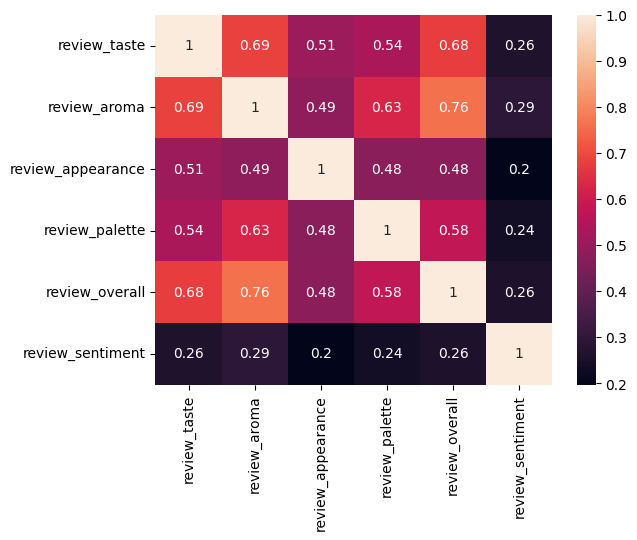

In [56]:
# correlation with other review factors
sns.heatmap(data=beer_quad[[
    'review_taste',
    'review_aroma',
    'review_appearance',
    'review_palette',
    'review_overall',
    'review_sentiment'
]].corr(), annot=True)


Overall rather weak correlation between the sentiment of the review with other review factors as well. This is plausible because the review text could just contain descriptions of the beer rather than "how good it is"; with "how good" a beer is being reflected in the review scores.